In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

the datset was not seperated by comma, instead by ';'.

In [110]:
import csv

# Define the input and output file names
input_file = r'PWC Digital Intell dataset\bank-additional-full.csv'
output_file = 'dataset.csv'

# Open the input CSV file with a semi-colon delimiter and the output file with a comma delimiter
with open(input_file, 'r', newline='') as infile, open(output_file, 'w', newline='') as outfile:
    # Create CSV readers and writers for the input and output files
    reader = csv.reader(infile, delimiter=';')
    writer = csv.writer(outfile, delimiter=',')

    # Iterate through each row in the input file and write it with a comma delimiter to the output file
    for row in reader:
        writer.writerow(row)

print(f'Delimiter changed from semi-colon to comma. Output saved in {output_file}')


Delimiter changed from semi-colon to comma. Output saved in dataset.csv


In [111]:
df = pd.read_csv('dataset.csv')
df.head(2).T

,0,1
age,56,57
job,housemaid,services
marital,married,married
education,basic.4y,high.school
default,no,unknown
housing,no,no
loan,no,no
contact,telephone,telephone
month,may,may
day_of_week,mon,mon


In [112]:
df[['age','nr.employed','euribor3m','emp.var.rate','cons.conf.idx','contact','cons.price.idx','pdays']].describe(percentiles=[])

,age,nr.employed,euribor3m,emp.var.rate,cons.conf.idx,cons.price.idx,pdays
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,5167.035911,3.621291,0.081886,-40.502600,93.575664,962.475454
std,10.42125,72.251528,1.734447,1.570960,4.628198,0.578840,186.910907
min,17.00000,4963.600000,0.634000,-3.400000,-50.800000,92.201000,0.000000
50%,38.00000,5191.000000,4.857000,1.100000,-41.800000,93.749000,999.000000
max,98.00000,5228.100000,5.045000,1.400000,-26.900000,94.767000,999.000000


In [113]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [114]:
df[['duration','campaign','previous']].describe(percentiles=[])

,duration,campaign,previous
count,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,0.172963
std,259.279249,2.770014,0.494901
min,0.000000,1.000000,0.000000
50%,180.000000,2.000000,0.000000
max,4918.000000,56.000000,7.000000


In [115]:
desc = pd.DataFrame(index = list(df))
desc['dtype'] = df.dtypes
desc['null_cnt'] = df.isnull().sum()
desc['cnt'] = df.shape[0]
desc['nunique()'] = df.nunique()
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,dtype,null_cnt,cnt,nunique(),count,mean,std,min,25%,50%,75%,max
age,int64,0,41188,78,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
job,object,0,41188,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,object,0,41188,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,object,0,41188,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,object,0,41188,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,object,0,41188,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,object,0,41188,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The figure layout has changed to tight


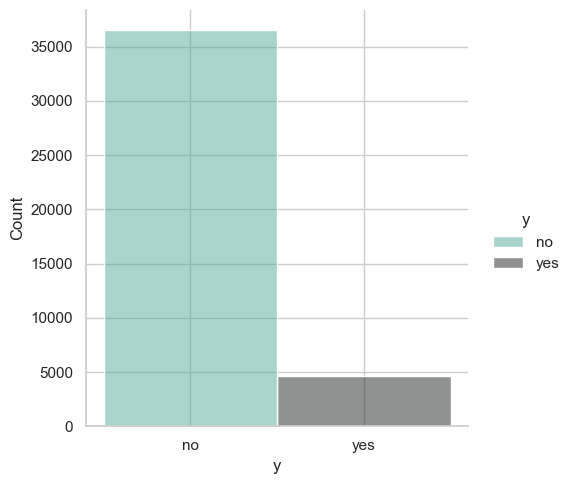

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df,x='y',palette='dark:#5A9_r',hue='y')


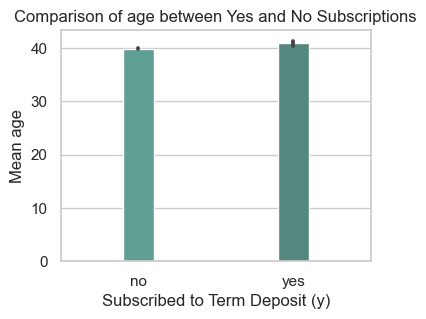

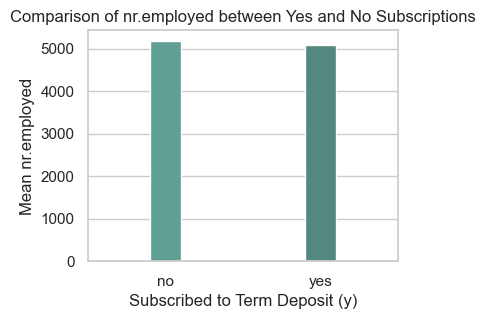

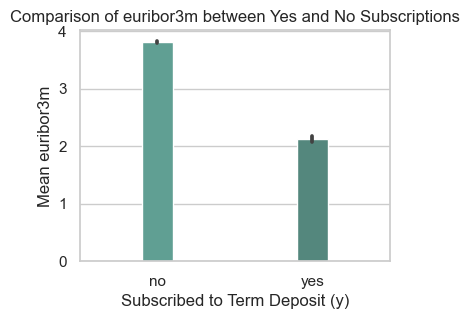

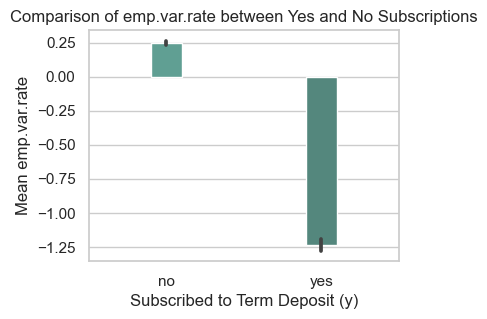

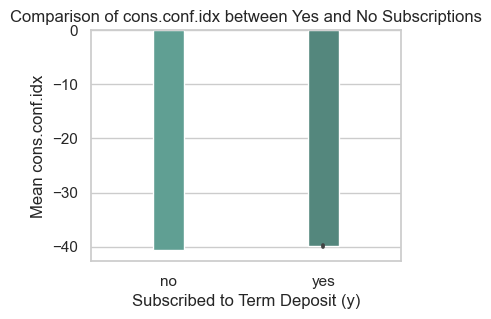

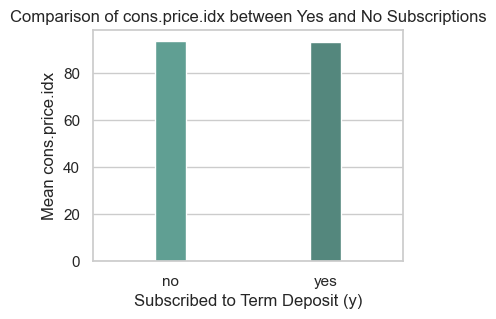

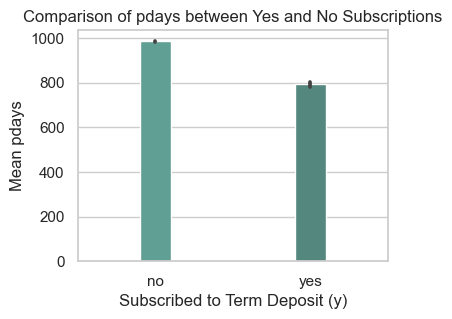

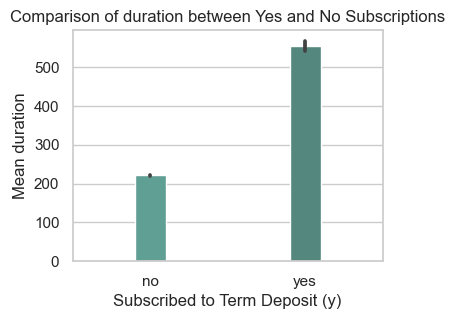

In [117]:
sns.set(style="whitegrid")


feature = ['age', 'nr.employed', 'euribor3m', 'emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'pdays','duration']
for i in feature:
    plt.figure(figsize=(4, 3))
    custom_palette = sns.color_palette("dark:#5A9_r")
    sns.barplot(x='y', y=i, data=df,  palette=custom_palette,width=0.2)

    plt.xlabel('Subscribed to Term Deposit (y)')
    plt.ylabel(f'Mean {i}')
    plt.title(f'Comparison of {i} between Yes and No Subscriptions')

    plt.show()


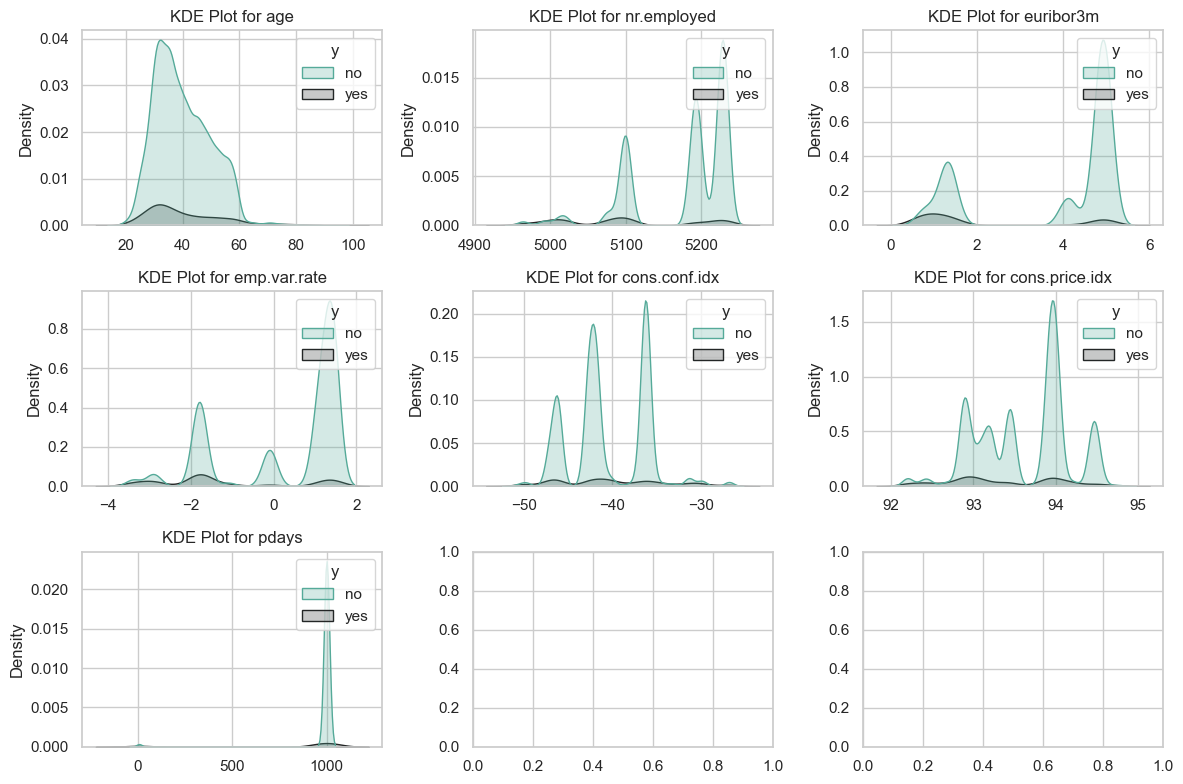

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

x = ['age', 'nr.employed', 'euribor3m', 'emp.var.rate', 'cons.conf.idx', 'cons.price.idx', 'pdays']
num_cols = 3

num_rows = (len(x) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for feature, ax in zip(x, axes.flatten()):
    sns.kdeplot(data=df, x=feature, hue='y', fill=True, palette='dark:#5A9_r', ax=ax)
    ax.set_title(f'KDE Plot for {feature}')
    ax.set_xlabel('')

for i in range(len(x), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [119]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [120]:
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [121]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [122]:
df[cat] = df[cat].replace("unknown",np.nan)

In [123]:
df['job'] = df['job'].fillna("unemployed")
df['marital'] = df['marital'].fillna("single")
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['default'] = df['default'].fillna("no")
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df['loan'].fillna("no")

In [124]:
cat.remove("job")
cat.remove("education")

In [125]:
for i in cat:
    print(i,end=":")
    print(df[i].unique())

marital:['married' 'single' 'divorced']
default:['no' 'yes']
housing:['no' 'yes']
loan:['no' 'yes']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


In [126]:
for i in cat:
    if df[i].nunique()>3:
        cat.remove(i)
        df.drop(i,axis=1,inplace=True)

In [127]:
cat.remove('day_of_week')
df.drop('day_of_week',axis=1,inplace=True)

In [128]:
onehot=['job','marital','poutcome','education']
label=['default','housing','loan','contact']
scale=[x for x in num]

In [129]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
df[scale] = scaler.fit_transform(df[scale])

encoder = LabelEncoder()
df[label] = df[label].apply(encoder.fit_transform)
df = pd.get_dummies(df,columns=onehot,drop_first=True)
df.head().T


,0,1,2,3,4
age,1.533034,1.628993,-0.290186,-0.002309,1.533034
default,0,0,0,0,0
housing,0,0,1,0,0
loan,0,0,0,0,1
contact,1,1,1,1,1
duration,0.010471,-0.421501,-0.12452,-0.413787,0.187888
campaign,-0.565922,-0.565922,-0.565922,-0.565922,-0.565922
pdays,0.195414,0.195414,0.195414,0.195414,0.195414
previous,-0.349494,-0.349494,-0.349494,-0.349494,-0.349494
emp.var.rate,0.648092,0.648092,0.648092,0.648092,0.648092


In [130]:
#since duration determines the y but it is unpredictable, we can avoid duration
df.drop('duration',axis=1,inplace=True)
mp={'yes':1,'no':0}
df['y']=df['y'].map(mp)

In [131]:
col_order = df.columns
col_order

Index(['age', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'poutcome_nonexistent',
       'poutcome_success', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree'],
      dtype='object')

In [132]:
new_order = ['age', 'default', 'housing', 'loan', 'contact', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'poutcome_nonexistent',
       'poutcome_success', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree', 'y']

In [133]:
new_order_df = df[new_order]

In [134]:
class_0_of_dataset = new_order_df[new_order_df['y']==0]
print(class_0_of_dataset.shape[0])
class_0_of_dataset.shape[0]/new_order_df.shape[0]

36548


0.8873458288821987

In [135]:
class_1_of_dataset = new_order_df[new_order_df['y']==1]
print(new_order_df.shape[0])
print(class_1_of_dataset.shape[0])
class_1_of_dataset.shape[0]/new_order_df.shape[0]

41188
4640


0.11265417111780131

In [136]:
class_1_of_dataset.head()

,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,marital_single,poutcome_nonexistent,poutcome_success,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,y
75,0.093650,0,1,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,0,0,0,0,0,1
83,0.861322,0,1,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,0,0,0,0,1,1
88,0.861322,0,0,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,1,0,0,0,0,1
129,0.093650,0,1,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,0,0,0,1,0,1
139,0.477486,0,1,0,1,-0.565922,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,1,0,0,0,0,1


In [137]:
class_0_new =class_0_of_dataset.sample(n=4640, random_state=42) 
class_0_new.head()

,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,marital_single,poutcome_nonexistent,poutcome_success,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,y
4155,-1.537652,0,1,0,1,-0.204909,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,1,0,0,0,0,0
6627,-0.290186,0,0,0,1,-0.204909,0.195414,-0.349494,0.648092,0.722722,...,0,1,0,0,0,0,0,0,1,0
30628,0.381527,0,0,0,0,1.239145,-5.085241,1.671136,-1.197935,-1.179380,...,1,0,1,0,0,0,0,1,0,0
33335,-0.674021,0,0,0,0,-0.565922,0.195414,-0.349494,-1.197935,-1.179380,...,1,1,0,0,0,0,0,0,0,0
34134,-0.002309,0,1,1,0,-0.204909,0.195414,-0.349494,-1.197935,-1.179380,...,0,1,0,0,1,0,0,0,0,0


In [138]:
class_1_of_dataset = pd.concat([class_1_of_dataset,class_0_new],axis=0)
class_1_of_dataset.shape[0]

9280

In [139]:
class_1_of_dataset.y.value_counts()

1    4640
0    4640
Name: y, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split
x = class_1_of_dataset.drop('y',axis=1,inplace=False)
y = class_1_of_dataset['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

logistic regression

In [142]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
acc_lg = accuracy_score(y_test,y_pred)
print("lg_test: ",acc_lg)
print()
y_pred_tr = lg.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()

clf = classification_report(y_test,y_pred)
print(clf)

lg_test:  0.7313218390804598

lg_tr:  0.729371921182266

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1387
           1       0.78      0.65      0.71      1397

    accuracy                           0.73      2784
   macro avg       0.74      0.73      0.73      2784
weighted avg       0.74      0.73      0.73      2784



In [143]:
dt = DecisionTreeClassifier(max_depth =5,random_state = 42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("lg_test: ",acc)
print()
y_pred_tr = dt.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()

clf = classification_report(y_test,y_pred)
print(clf)

lg_test:  0.7252155172413793

lg_tr:  0.7398399014778325

              precision    recall  f1-score   support

           0       0.66      0.91      0.77      1387
           1       0.86      0.54      0.66      1397

    accuracy                           0.73      2784
   macro avg       0.76      0.73      0.72      2784
weighted avg       0.76      0.73      0.72      2784



In [144]:
gb_dt = GradientBoostingClassifier(n_estimators=12,learning_rate=0.5,max_depth=6,max_features=.5)
gb_dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

acc_lg = accuracy_score(y_test,y_pred)
print("lg_test: ",acc_lg)
print()
y_pred_tr = gb_dt.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()


clf = classification_report(y_test,y_pred)
print(clf)

lg_test:  0.7252155172413793

lg_tr:  0.791564039408867

              precision    recall  f1-score   support

           0       0.66      0.91      0.77      1387
           1       0.86      0.54      0.66      1397

    accuracy                           0.73      2784
   macro avg       0.76      0.73      0.72      2784
weighted avg       0.76      0.73      0.72      2784



hyper tuning


In [145]:
from sklearn.model_selection import GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_model = best_estimator
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [146]:
print(accuracy)

0.7435344827586207


In [147]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1387
           1       0.81      0.64      0.72      1397

    accuracy                           0.74      2784
   macro avg       0.75      0.74      0.74      2784
weighted avg       0.75      0.74      0.74      2784



In [148]:
# training
y_pred = best_model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.7544642857142857


In [149]:
import joblib
joblib.dump(best_model, 'gb_clf_hypertuned.pkl')

['gb_clf_hypertuned.pkl']

bagging classifier

In [150]:
base_estimator = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=150,max_samples=0.5, random_state=42)
# Train the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)
y_pred = bagging_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy: 0.9508928571428571
Accuracy: 0.7280890804597702


In [151]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1387
           1       0.78      0.64      0.70      1397

    accuracy                           0.73      2784
   macro avg       0.74      0.73      0.73      2784
weighted avg       0.74      0.73      0.73      2784



random forest

In [152]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x_train, y_train)
y_pred = random_forest_classifier.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)
y_pred = random_forest_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9966133004926109
Accuracy: 0.7212643678160919


In [153]:
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1387
           1       0.76      0.65      0.70      1397

    accuracy                           0.72      2784
   macro avg       0.73      0.72      0.72      2784
weighted avg       0.73      0.72      0.72      2784



so far we tried the best accuracy is given by gradient boosting classifier hyper tuned
a testing accuracy and training accuracy of 90%

In [154]:
import shap
explainer = shap.Explainer(best_model)

shap_values = explainer.shap_values(x_train)


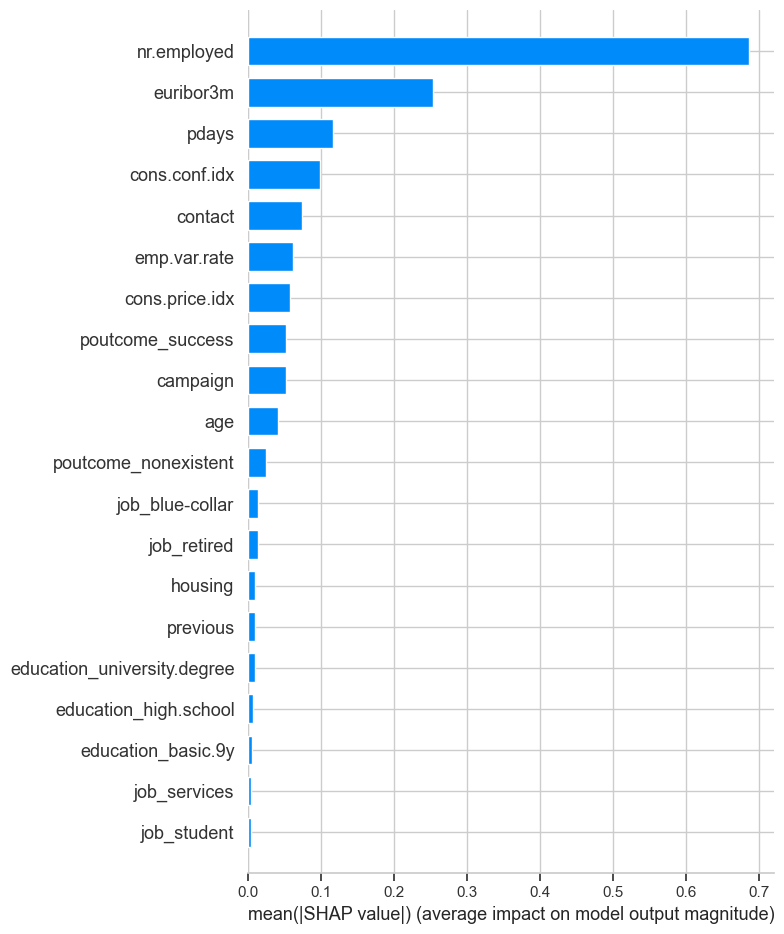

In [155]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type='bar')

Observation #4

In [156]:
instance = x_test.iloc[4]

shap_values_instance = explainer.shap_values(instance)
# print(shap_values.shape)
# print(shap_values_instance.shape)
# print("model classes:",best_model.classes_)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_instance, instance)


Observation #20

In [157]:
instance = x_test.iloc[20]

shap_values_instance = explainer.shap_values(instance)
# print(shap_values.shape)
# print(shap_values_instance.shape)
# print("model classes:",best_model.classes_
#       )

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_instance, instance)
